## Начинаем работу с нашим датасетом
##### Подготовил Кипренко Евгений
email: zhenyakiprenko@gmail.com

Загружаем наш изначальный (полный) ДатаФрейм, чтобы выделить из него тестовый Датафрейм.
Я решил, что мой тестовый Датафрейм, в контексте данной задачи, будет 5%, что равно 0.05.Аргументирую это тем, что полный датасет в 5000+ данных очень долго будет обрабатываться. А 5%, что равно примерно 250 записям - нет.

In [313]:
import pandas as pd
import json

full_df = pd.read_csv('cinema1.csv')
test_dataset_size = int(0.05 * len(full_df))
df = full_df.iloc[0:test_dataset_size]
print('Размер тестового Датафрейма:', len(df))

Размер тестового Датафрейма: 252


Заменяем NaN на -1.
Выбрал -1 потому, что это частая практика в программировании заменять отсутствие значения таким числом. Плюс, насколько я заметил, в наших данных все числа больше 0, а это значит, что я не внесу своими минус единицами проблем.

In [314]:
df = df.fillna(-1)

Сохраним наш тестовый Датафрейм.

In [315]:
df.to_csv(path_or_buf='test_cinema1.csv')

Смотрим,какие столбцы у нас есть. Заюзаем json чтобы вывести красивенько.

In [316]:
print('Наш Датафрейм имеет такие столбцы:\n', json.dumps(list(df.columns.values), indent=4))

Наш Датафрейм имеет такие столбцы:
 [
    "Unnamed: 0",
    "color",
    "director_name",
    "num_critic_for_reviews",
    "duration",
    "director_facebook_likes",
    "actor_3_facebook_likes",
    "actor_2_name",
    "actor_1_facebook_likes",
    "gross",
    "genres",
    "actor_1_name",
    "movie_title",
    "num_voted_users",
    "cast_total_facebook_likes",
    "actor_3_name",
    "facenumber_in_poster",
    "plot_keywords",
    "movie_imdb_link",
    "num_user_for_reviews",
    "language",
    "country",
    "content_rating",
    "budget",
    "title_year",
    "actor_2_facebook_likes",
    "imdb_score",
    "aspect_ratio",
    "movie_facebook_likes",
    "Unnamed: 28",
    "war_symb_title",
    "point_symb_title"
]


### Построим распределение жанров по рейтингу, прибыльности, лайкам

Вытащим жанры, лайки, прибыль и рейтинг фильмов, чтобы построить наше распределение.
**Надеюсь я не ошибся и правильно понял, что прибыль это 'gross'.**
В качестве рейтинга используем Рейтинг IMDB

In [317]:
genres_likes_df = df[['genres', 'movie_facebook_likes', 'gross', 'imdb_score']]

Подсчитываем суммарно лайки, прибыль и рейтинг для каждого из жанров. Так как жанров у фильма несколько, то мы разделяем и считаем для каждого отдельно.
К примеру, если у фильма жанр Fantasy и Adventure, а прибыль 100 000, значит что мы запишем прибиль для Fantasy 100 000 и Adventure 100 000.
Для удобства используем Counter, он нам поможет потом легко отделить лишь самые топовые по показателям жанры.

In [318]:
from collections import Counter

# Добавляет значение в счётчик, если такого ключа там ещё нет.
# Иначе, добавит новое значение к уже имеющемуся
def add_or_sum_to_counter(c: Counter, key: str, value: float):
    if value == -1:
        return
    
    if key in c.keys():
        c[key] += value
    else:
        c[key] = value
    

genres_likes = Counter()
genres_gross = Counter()
genres_score = Counter()
# Считаем сколько фильмов каждого жанра, чтобы потом сделать нормализацию.
genres_films_count = Counter()
for index, row in genres_likes_df.iterrows():
    genres_list = row['genres'].split('|')
    for genre in genres_list:
        add_or_sum_to_counter(genres_likes, genre, float(row['movie_facebook_likes']))
        add_or_sum_to_counter(genres_gross, genre, float(row['gross']))
        add_or_sum_to_counter(genres_score, genre, float(row['imdb_score']))
        add_or_sum_to_counter(genres_films_count, genre, 1)

print('Топ-3 жанра суммарно по лайкам', genres_likes.most_common(3))
print('Топ-3 жанра суммарно по прибыли',genres_gross.most_common(3))
print('Топ-3 жанра суммарно по рейтингу',genres_score.most_common(3))

Топ-3 жанра суммарно по лайкам [('Adventure', 7246427.0), ('Action', 5433717.0), ('Sci-Fi', 4371677.0)]
Топ-3 жанра суммарно по прибыли [('Adventure', 38208627984.0), ('Action', 30147725745.0), ('Sci-Fi', 19417837718.0)]
Топ-3 жанра суммарно по рейтингу [('Adventure', 1366.6999999999998), ('Action', 1129.8), ('Sci-Fi', 660.2000000000003)]


##### Делаем нормализацию перед тем как строить распределение по жанрам.
Сначала делим сумму лайков, прибыли и рейтинга для каждого из жанров чтобы найти среднее значение.

In [319]:
def take_avg(c: Counter, genre: str, films_count: float):
    # It's easier to ask for forgiveness than getting permission
    try:
        c[genre] = c[genre] / films_count
    except KeyError:
        pass

for genre, films_count in genres_film_count.items():
    take_avg(genres_likes, genre, films_count)
    take_avg(genres_gross, genre, films_count)
    take_avg(genres_score, genre, films_count)
    

print('Топ-3 жанра в среднем по лайкам', genres_likes.most_common(3))
print('Топ-3 жанра в среднем по прибыли',genres_gross.most_common(3))
print('Топ-3 жанра в среднем по рейтингу',genres_score.most_common(3))

Топ-3 жанра в среднем по лайкам [('Western', 66000.0), ('Sci-Fi', 45068.83505154639), ('Drama', 42800.0)]
Топ-3 жанра в среднем по прибыли [('Sci-Fi', 200183894.0), ('Fantasy', 199652808.79787233), ('Musical', 199268052.25)]
Топ-3 жанра в среднем по рейтингу [('Mystery', 7.2), ('Documentary', 7.1), ('Animation', 7.002173913043479)]


Теперь используя наши средние значения делаем нормализацию.
К примеру, если брать лайки, делим лайки одного жанра на сумму лайков всех жанров. И так же для прибыли и рейтинга.

In [320]:
likes_sum = sum(genres_likes.values())
grosses_sum = sum(genres_gross.values())
scores_sum = sum(genres_score.values())

for genre in genres_films_count.keys():
    genres_likes[genre] = (genres_likes[genre] / likes_sum) * 100
    genres_gross[genre] = (genres_gross[genre] / grosses_sum) * 100 
    genres_score[genre] = (genres_score[genre] / scores_sum) * 100

После того, как наши данные были подготовлены, можем рисовать наши графики. Чтобы сделать графики более читаемыми, я решил выводить лишь топ-10. При надобности, вы можете вывести любое число.

**Обратите внимание, что были посчитаны средние значения и проделана нормализация для значений на графиках**

Применим fivethirtyeight, чтобы по красоте всё:)

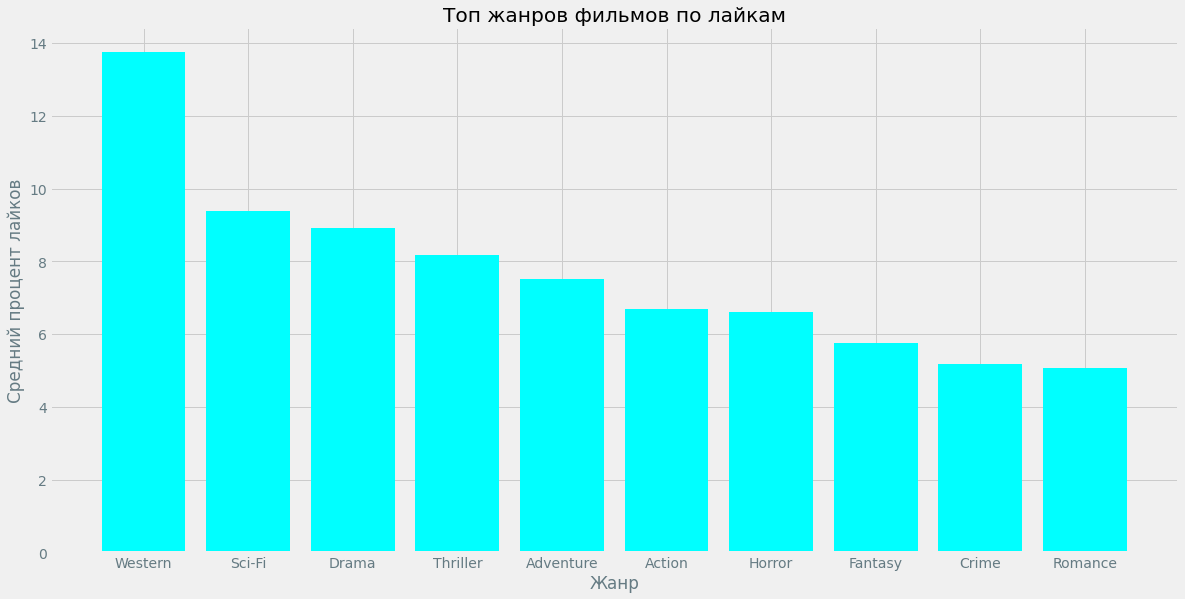

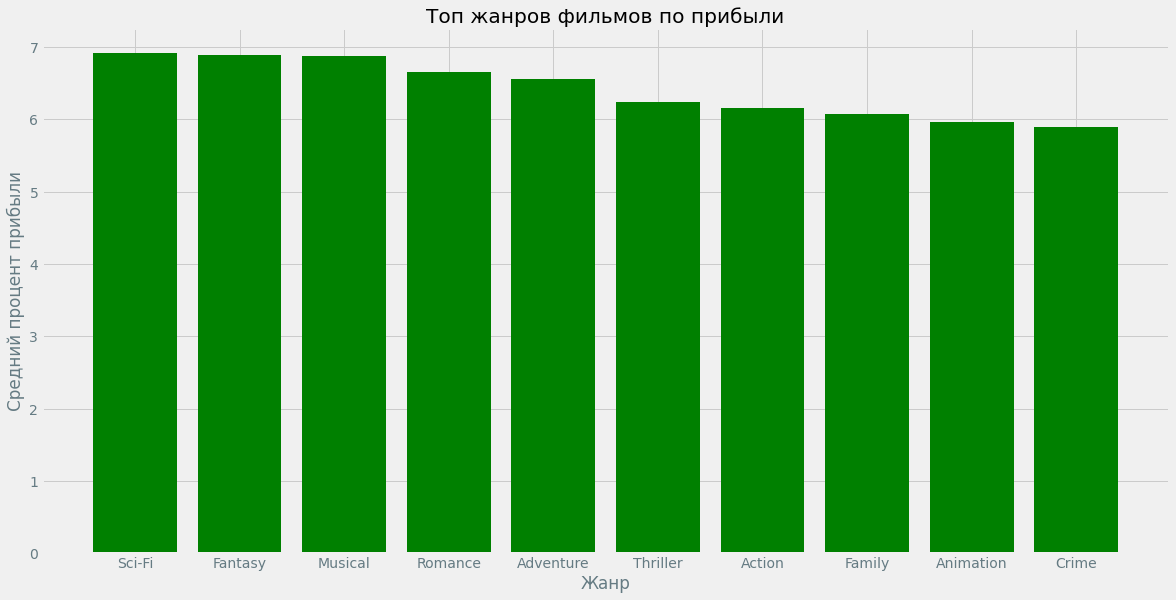

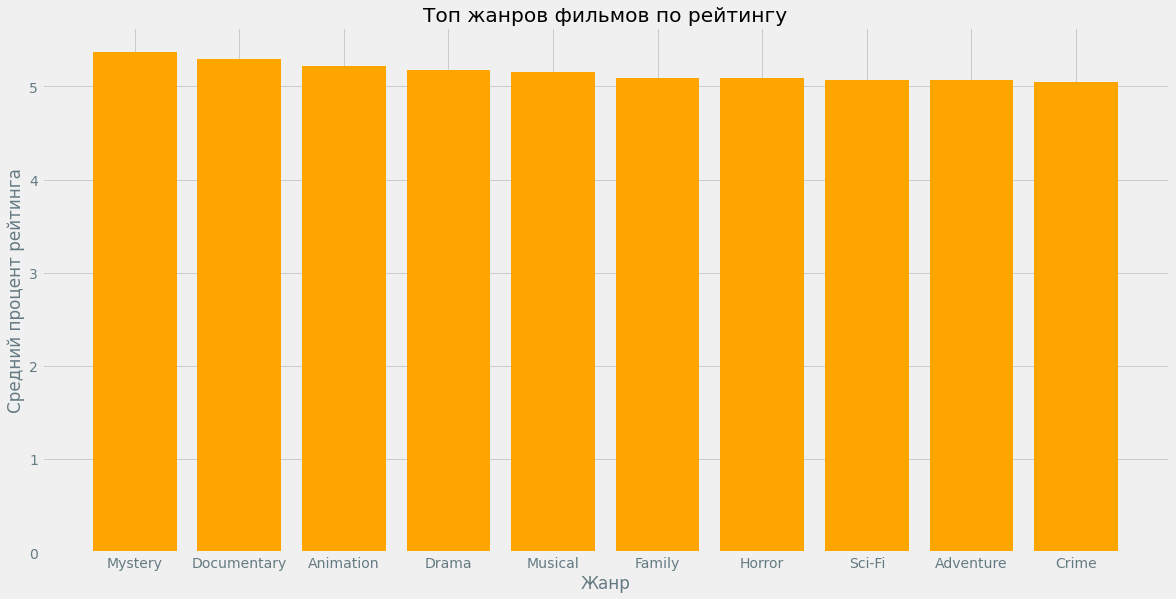

In [321]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

top_20_genres_by_likes = dict(genres_likes.most_common(10))
plt.figure(figsize=(18, 9))
plt.bar(list(top_20_genres_by_likes.keys()), list(top_20_genres_by_likes.values()), color='cyan') 
plt.xlabel('Жанр') 
plt.ylabel('Средний процент лайков') 
plt.title('Топ жанров фильмов по лайкам', color='black')
plt.savefig('Топ жанров фильмов по лайкам.png')
plt.show() 

top_20_genres_by_gross = dict(genres_gross.most_common(10))
plt.figure(figsize=(18, 9))
plt.bar(list(top_20_genres_by_gross.keys()), list(top_20_genres_by_gross.values()), color='green')  
plt.xlabel('Жанр') 
plt.ylabel('Средний процент прибыли') 
plt.title('Топ жанров фильмов по прибыли', color='black')
plt.savefig('Топ жанров фильмов по прибыли.png')
plt.show() 

top_20_genres_by_score = dict(genres_score.most_common(10))
plt.figure(figsize=(18, 9))
plt.bar(list(top_20_genres_by_score.keys()), list(top_20_genres_by_score.values()), color='orange')  
plt.xlabel('Жанр') 
plt.ylabel('Средний процент рейтинга') 
plt.title('Топ жанров фильмов по рейтингу', color='black') 
plt.savefig('Топ жанров фильмов по рейтингу.png')
plt.show() 

**Замечу**, что скорее всего Вестерны в топе по лайкам, потому что их мало.

### Найти топ 20 связок (если такие есть) актер-режиссер, которые дают больше денег в прокате

Составим пары режиссёр-актёр, а после будем считать для них статистику.
Используем уже знакомый нам collections.Counter. Не забываем проверочку на -1. 
Если для предыдущих графиков я брал среднее, то в это раз не буду. Дело касается денег и нет смысла брать среднее.

In [322]:
def count_director_actor_gross(c: Counter(), director: str, actor: str, gross: float):
    if director != -1 and actor != -1 and gross != -1:
        director_actor_pair = director.strip() + ' and ' + actor.strip()
        if director_actor_pair in c:
            c[director_actor_pair] += gross
        else:
            c[director_actor_pair] = gross

director_actor_gross = Counter()
for index, row in df[['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'gross']].iterrows():
    director = row['director_name']
    gross = row['gross']
    count_director_actor_gross(director_actor_gross, director, row['actor_1_name'], gross)
    count_director_actor_gross(director_actor_gross, director, row['actor_2_name'], gross)
    count_director_actor_gross(director_actor_gross, director, row['actor_3_name'], gross)

Получили наши данные в формате Режиссёр-Актёр: прибыль, которую они заработали.
Теперь строим наш график и выводим Топ-20 (для чего нам и пригодится Counter).
Подпись Режиссёр-Актёр сделал вертикально, чтобы не сливались надписи.

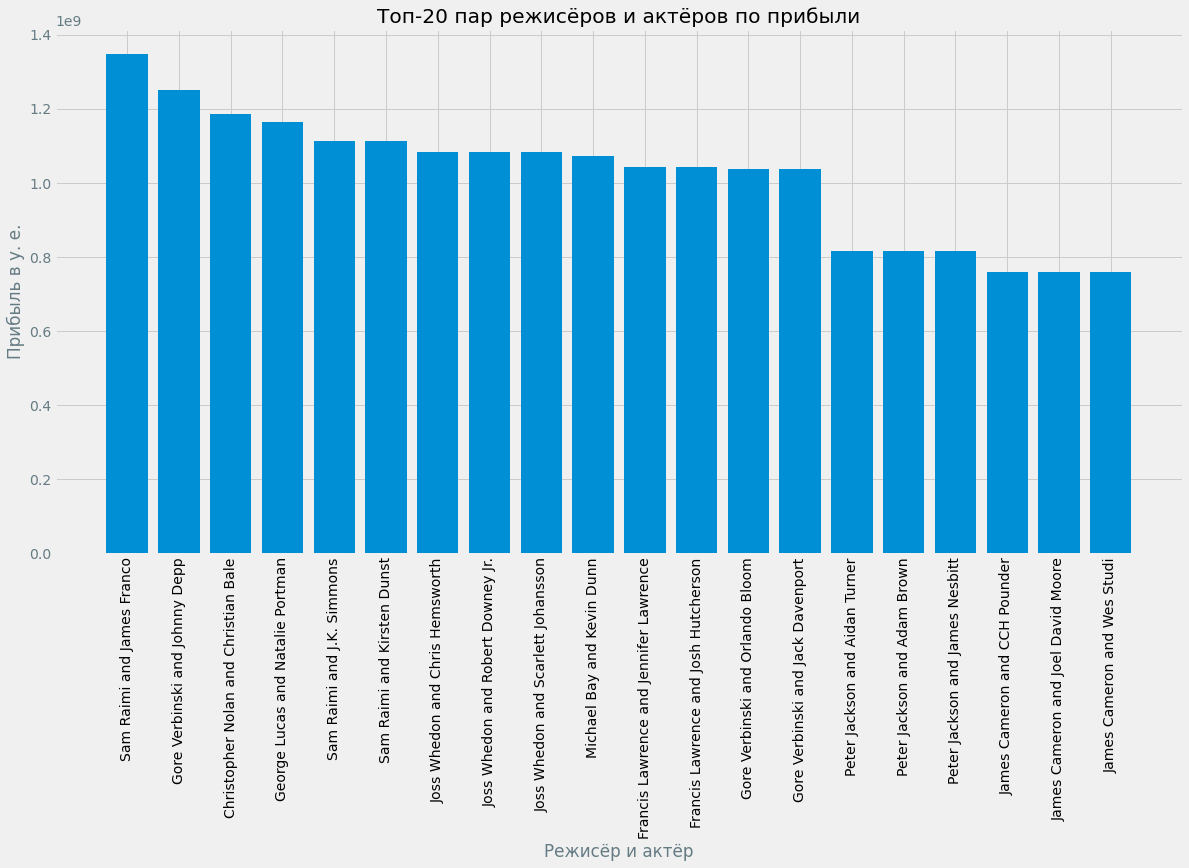

In [323]:
top_20_dir_act_by_gross = dict(director_actor_gross.most_common(20))
plt.figure(figsize=(18, 9))
heights = [10, 20, 15]
bars = list(top_20_dir_act_by_gross.keys())
y_pos = range(len(bars))
plt.bar(y_pos, list(top_20_dir_act_by_gross.values())) 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90, color='black')
plt.xlabel('Режисёр и актёр') 
plt.ylabel('Прибыль в у. е.') 
plt.title('Топ-20 пар режисёров и актёров по прибыли', color='black')
plt.savefig('Топ-20 пар режисёров и актёров по прибыли.png')
plt.show()

### Указать, фильмы из какой страны имеют лучший средний рейтинг. Проанализировать ответ и аргументировать вердикт


In [324]:
country_sum_score = Counter()
counter_film_count = Counter()
for index, row in df[['country', 'imdb_score']].iterrows():
    country = row['country']
    score = row['imdb_score']
    if country == -1 or score == -1:
        continue
    add_or_sum_to_counter(country_sum_score, country, score)
    add_or_sum_to_counter(counter_film_count, country, 1)
print('Количество фильмов по странам \n', counter_film_count)

Количество фильмов по странам 
 Counter({'USA': 217, 'UK': 19, 'Australia': 5, 'New Zealand': 2, 'Canada': 2, 'Japan': 2, 'Belgium': 1, 'Germany': 1, 'China': 1, 'France': 1})


Находим среднюю прибыль.

In [325]:
for country, score in country_sum_score.items():
    country_sum_score[country] = score / counter_film_count[country]
print('Средний рейтинг фильмов по странам: \n', country_sum_score)

Средний рейтинг фильмов по странам: 
 Counter({'Japan': 8.2, 'China': 7.4, 'New Zealand': 7.35, 'Canada': 7.15, 'UK': 7.0473684210526315, 'Australia': 6.92, 'USA': 6.734101382488477, 'Germany': 5.5, 'France': 5.1, 'Belgium': 4.5})


А теперь строим наш график. Вывожу лишь Топ-10 для читаемости. При надобности, можете вывести больше или меньше 

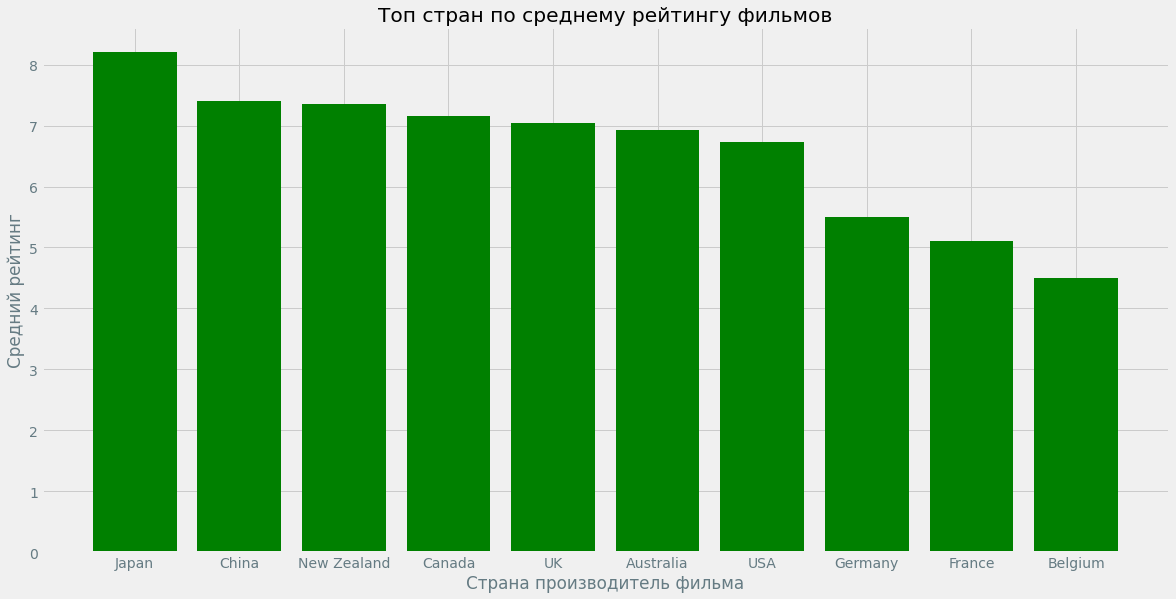

In [326]:
top_20_film_countries_by_rate = dict(country_sum_score.most_common(10))
plt.figure(figsize=(18, 9))
plt.bar(list(top_20_film_countries_by_rate.keys()), list(top_20_film_countries_by_rate.values()), color='green')  
plt.xlabel('Страна производитель фильма') 
plt.ylabel('Средний рейтинг') 
plt.title('Топ стран по среднему рейтингу фильмов', color='black')
plt.savefig('Топ стран по среднему рейтингу фильмов.png')
plt.show() 

Анализ графика: мы видим, что в топ вырвались страны, у которых фильмов было меньше.
А это значит, что при подсчёте среднего рейтинга это выбило их в топ.
Ведь если взять США, у которой фильмо много, но они как плохие, так и хорошие, потому средний рейтинг ниже, чем устран, где фильмов мало.
То есть, для более адекватного подсчёта среднего значения, лучше убрать из выборки страны, которые произвели фильмов меньше какого-то определённого значения. Скажем, чтобы фильмов у страны было не менее 10.